# 1. Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(10)

# 2. Load the data

In [2]:
data = pd.read_csv("IRIS.csv")

In [3]:
data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 3. Data visualization and preprocessing

In [7]:
# Classify the variables
category1 = ["sepal_length","sepal_width","petal_length","petal_width"]
category2 = ["species"]

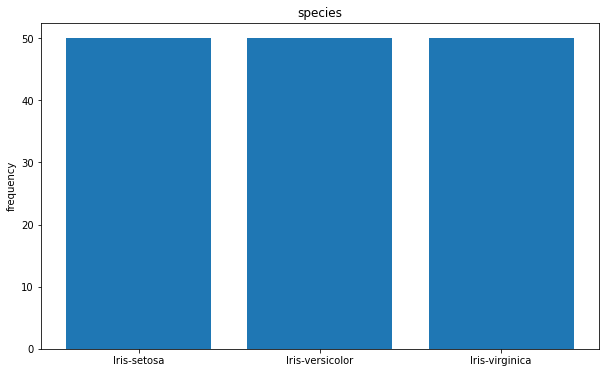

species: 
 Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [8]:
# Categorical variable info
def bar_plot(variable):
    # features
    var = data[variable]
    # count the numbers of categorical variables
    var_value = var.value_counts()
    #visualize
    plt.figure(figsize=(10,6))
    plt.bar(var_value.index, var_value)
    plt.xticks(var_value.index, var_value.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable, var_value))
    
for a in category2:
    bar_plot(a)

In [9]:
# Numerical variables info
for c in category1:
    print("{}\n".format(data[c].value_counts()))

5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64

3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64

1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2     2
4.3     2
1.9     2
3.5     2
5.2     2
3.0     1
1.1     1
3.7

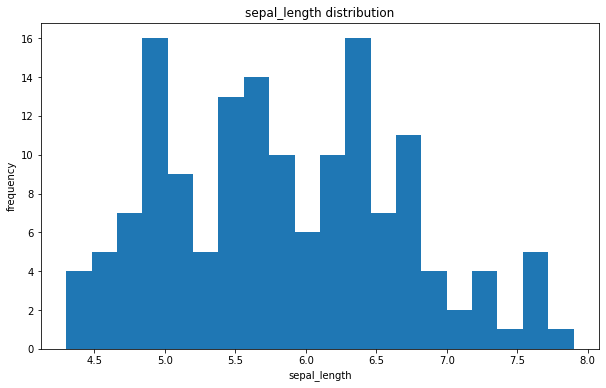

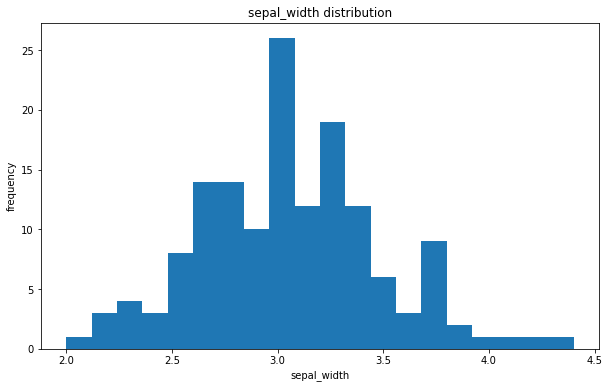

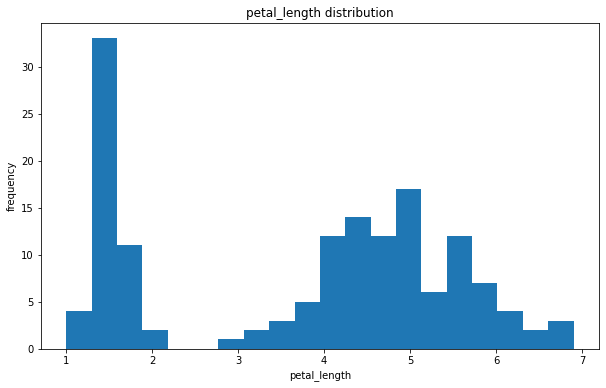

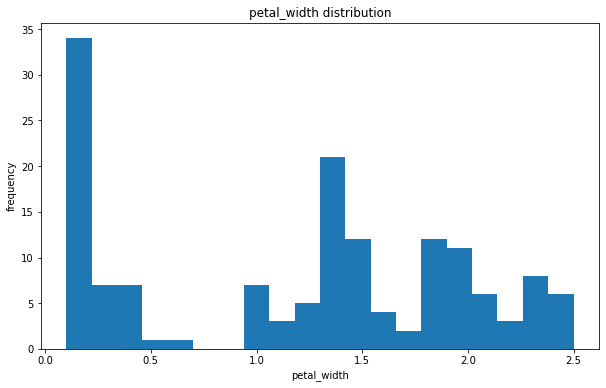

In [10]:
#Numerical variables
numeric_var = ["sepal_length","sepal_width","petal_length","petal_width"]
def plot_hist(variable):
    
    plt.figure(figsize=(10,6))
    plt.hist(data[variable],bins=20)
    plt.xlabel(variable)
    plt.ylabel("frequency")
    plt.title("{} distribution".format(variable))
    plt.show()

    
for n in numeric_var:
    plot_hist(n)

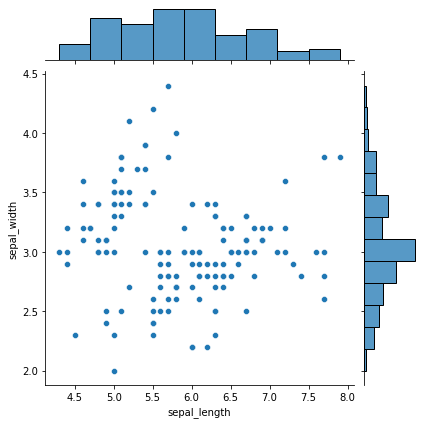

In [11]:
sns.jointplot(x='sepal_length',y='sepal_width',data = data)

<AxesSubplot:xlabel='petal_length', ylabel='species'>

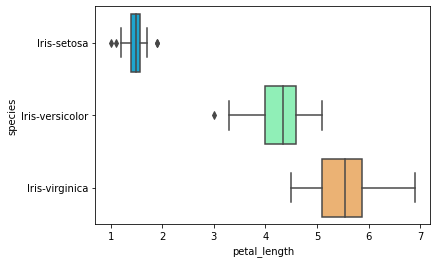

In [12]:
sns.boxplot(x='petal_length',y='species',data=data,palette='rainbow')

/Users/anishaduwadi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='petal_length', ylabel='species'>

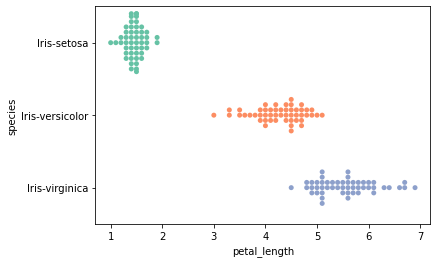

In [13]:
sns.swarmplot(x='petal_length',y='species',data=data,palette='Set2')

Text(0.5, 1.0, 'data.corr()')

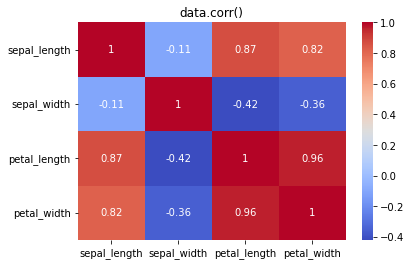

In [14]:
# Let's check the correlation between variables
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('data.corr()')

In [15]:
#Import the necessary libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier

In [16]:
# Split the data into Training and Testing datasets
train, test = train_test_split(data, test_size = 0.3)

In [17]:
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [18]:
train.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
109,7.2,3.6,6.1,2.5,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
23,5.1,3.3,1.7,0.5,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [19]:
test.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
78,6.0,2.9,4.5,1.5,Iris-versicolor
74,6.4,2.9,4.3,1.3,Iris-versicolor
20,5.4,3.4,1.7,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [20]:
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species
y_test = test.species

In [21]:
X_train.head(3)

,sepal_length,sepal_width,petal_length,petal_width
109,7.2,3.6,6.1,2.5
111,6.4,2.7,5.3,1.9
23,5.1,3.3,1.7,0.5


In [22]:
y_train.head(3)

109    Iris-virginica
111    Iris-virginica
23        Iris-setosa
Name: species, dtype: object

# 4. Use the Machine Learning Models

# 4.1 Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
report = classification_report(y_test, y_pred_lr)
matrix = confusion_matrix(y_test,y_pred_lr)
print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc1=accuracy_score(y_test,y_pred_lr)
print("\n Logistic Regression, Accuracy Score:" , acc1)

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion matrix 
 [[17  0  0]
 [ 0 16  1]
 [ 0  0 11]]

 Logistic Regression, Accuracy Score: 0.9777777777777777


/Users/anishaduwadi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 4.2 Support Vector Machine

In [24]:
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score 
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
report = classification_report(y_test, y_pred_svm)
matrix = confusion_matrix(y_test,y_pred_svm)
print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc2=accuracy_score(y_test,y_pred_svm)
print("\n SVM, Accuracy Score:" , acc2)

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion matrix 
 [[17  0  0]
 [ 0 17  0]
 [ 0  0 11]]

 SVM, Accuracy Score: 1.0


In [25]:
# SVM - Grid Search
# defining parameter range
grid_param_svm = {'C': [0.1, 1, 10],
              'gamma': [ 0.1, 0.01, 0.001],
              'kernel': ['rbf','linear' ]}                #'sigmoid',...
 
grid_search_svm = GridSearchCV(svm, grid_param_svm, refit = True, verbose = 3)
 
grid_search_svm.fit(X_train, y_train)

print("SVM, Grid search best parameters:", grid_search_svm.best_params_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.810 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.762 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.952 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.952 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.857 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.857 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.714 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

In [26]:
grid_pred_svm = grid_search_svm.predict(X_test)
report = classification_report(y_test, grid_pred_svm)
matrix = confusion_matrix(y_test,grid_pred_svm)

print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc2_g=accuracy_score(y_test,grid_pred_svm)

print("\n SVM Grid search, Accuracy Score:" , acc2_g)

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion matrix 
 [[17  0  0]
 [ 0 16  1]
 [ 0  0 11]]

 SVM Grid search, Accuracy Score: 0.9777777777777777


# 4.3 Decision Tree classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtree =DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=2)
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
report = classification_report(y_test, y_pred_dtree)
matrix = confusion_matrix(y_test,y_pred_dtree)
print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc3=accuracy_score(y_test,y_pred_dtree)
print("\n Decision Tree Classifier, Accuracy Score:" , acc3)

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      0.88      0.94        17
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.96        45
      macro avg       0.95      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45

Confusion matrix 
 [[17  0  0]
 [ 0 15  2]
 [ 0  0 11]]

 Decision Tree Classifier, Accuracy Score: 0.9555555555555556


# 4.4 K Nearest Neighbors

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn =  KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
report = classification_report(y_test, y_pred_knn)
matrix = confusion_matrix(y_test,y_pred_knn)
print("Classification report\n", report)
print("Confusion matrix \n", matrix)
acc4=accuracy_score(y_test,y_pred_knn)
print("\n K-NN, Accuracy Score:" , acc4)

Classification report
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

Confusion matrix 
 [[17  0  0]
 [ 0 17  0]
 [ 0  0 11]]

 K-NN, Accuracy Score: 1.0


/var/folders/1v/6p05t0zs6wz9h2z02rh1n5240000gn/T/ipykernel_4361/2135028043.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
/var/folders/1v/6p05t0zs6wz9h2z02rh1n5240000gn/T/ipykernel_4361/2135028043.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(pd.Series(metrics.accuracy_score(y_pred_knn,y_test)))
/var/folders/1v/6p05t0zs6wz9h2z02rh1n5240000gn/T/ipykernel_4361/2135028043.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a = a.append(pd.Series(metrics.accuracy_score(y_pred_knn,y_test)))
/var/folders/1v/6p05t0zs6wz9h2z02rh1n5240000gn/T/ipykernel_4361/2135028043.py:9: FutureWarning: The series.append method is deprecated and will be removed from pandas in a fu

([<matplotlib.axis.XTick at 0x7feeef759d90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

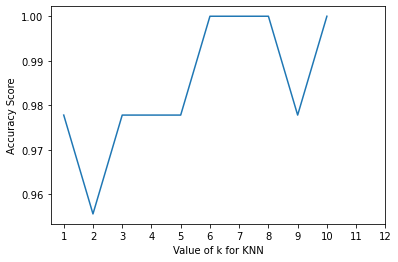

In [29]:
# For various values of K-NN
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10,11,12]
for i in list(range(1,11)):
    knn =  KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_knn = knn.predict(X_test)
    a = a.append(pd.Series(metrics.accuracy_score(y_pred_knn,y_test)))
plt.plot(a_index,a)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.xticks(x)

# 5. Comparison and Conclusion
Based on the accuracy scores, among the four ML models used here, SVM with grid serach and KNN models perform better in classifying the species of iris flowers data (as displayed below).
NOTE: We can also play and compare the performance by changing (or including the other dropped) variables and/or by fitting with other ML models.

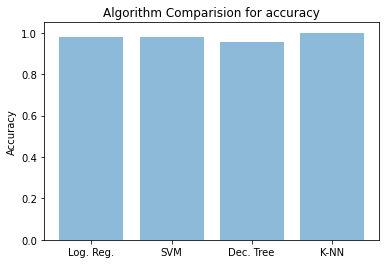

In [30]:
objects = ('Log. Reg.','SVM','Dec. Tree','K-NN')
y_pos = np.arange(len(objects))
performance = [acc1,acc2_g,acc3,acc4]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparision for accuracy')
plt.show()